In [1]:
from sklearn.datasets import make_classification

import numpy as np
import matplotlib.pyplot as plt
import itertools

from sklearn.ensemble import BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier

In [2]:
def get_data():
    x,y = make_classification(n_features=4)
    return x,y

In [3]:
def plot_data(x,y):
    subplot_start = 321
    col_numbers = range(0,4)
    col_pairs = itertools.combinations(col_numbers,2)
    
    for col_pair in col_pairs:
        plt.subplot(subplot_start)
        plt.scatter(x[:,col_pair[0]],x[:,col_pair[1]],c=y)
        title_string = str(col_pair[0]) + '-' + str(col_pair[1])
        plt.title(title_string)
        x_label = str(col_pair[0])
        y_label = str(col_pair[1])
        plt.xlabel(x_label)
        plt.ylabel(y_label)
        subplot_start +=1
    plt.show()

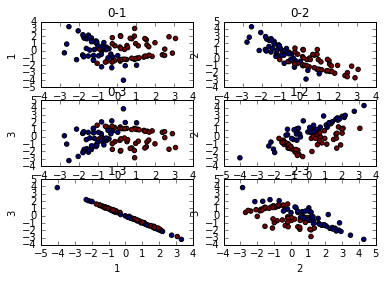

In [4]:
x,y = get_data()
plot_data(x,y)

In [5]:
from sklearn.cross_validation import StratifiedShuffleSplit
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

def get_train_test(x,y):
    train_size = 0.8
    test_size = 1 - train_size
    input_dataset = np.column_stack([x,y])
    stratified_split = StratifiedShuffleSplit(input_dataset[:,-1],test_size=test_size,n_iter=1)
    
    for train_indx,test_indx in stratified_split:
        train_x = input_dataset[train_indx,:-1]
        train_y = input_dataset[train_indx,-1]
        test_x = input_dataset[test_indx,:-1]
        test_y = input_dataset[test_indx,-1]
        
    return train_x,train_y,test_x,test_y

In [6]:
def build_model(x,y,k=2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x,y)
    return knn

In [7]:
def test_model(x,y,knn_model):
    y_predicted = knn_model.predict(x)
    print classification_report(y,y_predicted)

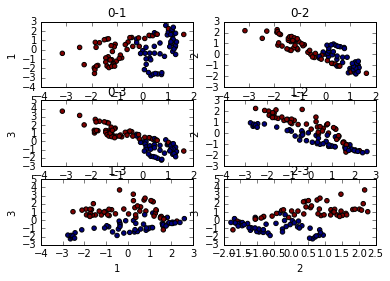


Model evalution on training set
             precision    recall  f1-score   support

        0.0       0.93      1.00      0.96        40
        1.0       1.00      0.93      0.96        40

avg / total       0.97      0.96      0.96        80


Modle evalution on test set
             precision    recall  f1-score   support

        0.0       1.00      0.90      0.95        10
        1.0       0.91      1.00      0.95        10

avg / total       0.95      0.95      0.95        20



In [8]:
if __name__ == '__main__':
    x,y = get_data()
    
    plot_data(x,y)
    
    train_x,train_y,test_x,test_y = get_train_test(x,y)
    
    knn_model = build_model(train_x,train_y)
    
    # 测试模型
    print '\nModel evalution on training set'
    print '================================='
    test_model(train_x,train_y,knn_model)
    
    print '\nModle evalution on test set'
    print '================================='
    test_model(test_x,test_y,knn_model)